# **Bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import normalize
from sklearn import preprocessing
import plotly.offline as py
import plotly.graph_objs as go

# **Acesso ao drive**

In [ ]:
from google.colab import drive

drive.mount("/content/drive")
data = pd.read_csv("drive/MyDrive/AM1-Qualidade-Agua/waterQuality1.csv")

Mounted at /content/drive


# **Análise do dataset**

In [ ]:
print(data)
#aluminium - dangerous if greater than 2.8
# ammonia - dangerous if greater than 32.5
# arsenic - dangerous if greater than 0.01
# barium - dangerous if greater than 2
# cadmium - dangerous if greater than 0.005
# chloramine - dangerous if greater than 4
# chromium - dangerous if greater than 0.1
# copper - dangerous if greater than 1.3
# flouride - dangerous if greater than 1.5
# bacteria - dangerous if greater than 0
# viruses - dangerous if greater than 0
# lead - dangerous if greater than 0.015
# nitrates - dangerous if greater than 10
# nitrites - dangerous if greater than 1
# mercury - dangerous if greater than 0.002
# perchlorate - dangerous if greater than 56
# radium - dangerous if greater than 5
# selenium - dangerous if greater than 0.5
# silver - dangerous if greater than 0.1
# uranium - dangerous if greater than 0.3

      aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.17      0.05

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
data.duplicated().any()

False

In [ ]:
# Procurando as linhas onde is_safe não é numérico.
print(data[data["is_safe"] == "#NUM!"])

      aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
7551       0.03   #NUM!     0.08    0.79     0.07        0.08      0.05   
7568       0.06   #NUM!     0.07    1.72     0.08        0.32      0.01   
7890       0.01   #NUM!     0.08    0.49     0.00        0.07      0.09   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
7551    0.58      0.34      0.00  ...  0.183      4.37      1.43    0.007   
7568    1.11      0.61      0.00  ...  0.178     12.10      2.03    0.008   
7890    0.06      0.72      0.57  ...  0.088      9.57      1.45    0.009   

      perchlorate  radium  selenium  silver  uranium  is_safe  
7551         0.62    2.54      0.07    0.05     0.05    #NUM!  
7568         1.37    2.05      0.06    0.10     0.07    #NUM!  
7890         7.67    7.70      0.03    0.05     0.02    #NUM!  

[3 rows x 21 columns]


In [ ]:
# Removendo as tuplas onde "is_safe" não possui valor numérico.
data = data[data["is_safe"] != "#NUM!"]
data["is_safe"] = pd.to_numeric(data["is_safe"])
data["ammonia"] = pd.to_numeric(data["ammonia"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

<ipython-input-7-90ac1f992b56>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-90ac1f992b56>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print(data[data["is_safe"] == 0].size / 21)
print(data[data["is_safe"] == 1].size / 21)

7084.0
912.0


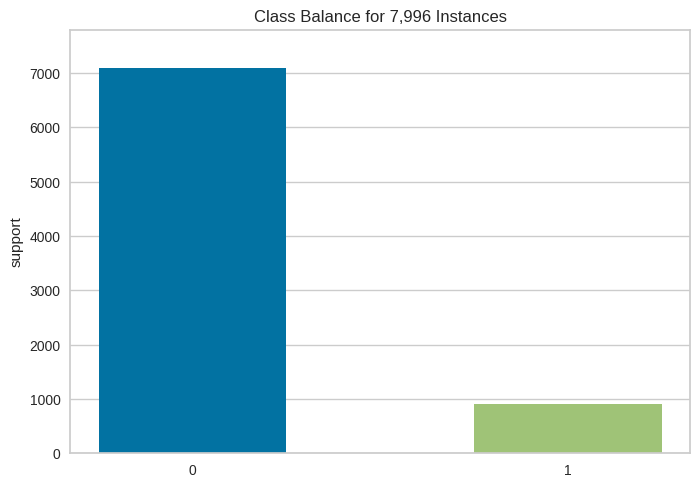

ClassBalance(ax=<Axes: title={'center': 'Class Balance for 7,996 Instances'}, ylabel='support'>)

In [ ]:
from yellowbrick.target import class_balance

class_balance(data["is_safe"])

In [ ]:
print("--------Aluminium--------")
print(data[data["aluminium"] > 2.8].is_safe.value_counts())
print("")
print("--------Arsenic--------")
print(data[data["arsenic"] > 0.01].is_safe.value_counts())
print("")
print("--------Barium--------")
print(data[data["barium"] > 2].is_safe.value_counts())
print("")
print("--------Cadmium--------")
print(data[data["cadmium"] > 0.005].is_safe.value_counts())
print("")
print("--------Chloramine--------")
print(data[data["chloramine"] > 4].is_safe.value_counts())
print("")
print("--------Chromium--------")
print(data[data["chromium"] > 0.1].is_safe.value_counts())
print("")
print("--------Copper--------")
print(data[data["copper"] > 1.3].is_safe.value_counts())
print("")
print("--------Fluoride--------")
print(data[data["flouride"] > 1.5].is_safe.value_counts())
print("")
print("--------Bacteria--------")
print(data[data["bacteria"] > 0].is_safe.value_counts())
print("")
print("--------Viruses--------")
print(data[data["viruses"] > 0].is_safe.value_counts())
print("")
print("--------Lead--------")
print(data[data["lead"] > 0.015].is_safe.value_counts())
print("")
print("--------Nitrates--------")
print(data[data["nitrates"] > 10].is_safe.value_counts())
print("")
print("--------Nitrites--------")
print(data[data["nitrites"] > 1].is_safe.value_counts())
print("")
print("--------Mercury--------")
print(data[data["mercury"] > 0.002].is_safe.value_counts())
print("")
print("--------Perchlorate--------")
print(data[data["perchlorate"] > 56].is_safe.value_counts())
print("")
print("--------Radium--------")
print(data[data["radium"] > 5].is_safe.value_counts())
print("")
print("--------Selenium--------")
print(data[data["selenium"] > 0.5].is_safe.value_counts())
print("")
print("--------Silver--------")
print(data[data["silver"] > 0.1].is_safe.value_counts())
print("")
print("--------Uranium--------")
print(data[data["uranium"] > 0.3].is_safe.value_counts())

--------Aluminium--------
0    578
1    285
Name: is_safe, dtype: int64

--------Arsenic--------
0    6136
1     685
Name: is_safe, dtype: int64

--------Barium--------
0    2251
1     391
Name: is_safe, dtype: int64

--------Cadmium--------
0    6040
1     478
Name: is_safe, dtype: int64

--------Chloramine--------
0    1726
1     402
Name: is_safe, dtype: int64

--------Chromium--------
0    2815
1     688
Name: is_safe, dtype: int64

--------Copper--------
0    2061
1     268
Name: is_safe, dtype: int64

--------Fluoride--------
Series([], Name: is_safe, dtype: int64)

--------Bacteria--------
0    4625
1     578
Name: is_safe, dtype: int64

--------Viruses--------
0    6030
1     663
Name: is_safe, dtype: int64

--------Lead--------
0    6410
1     831
Name: is_safe, dtype: int64

--------Nitrates--------
0    3606
1     360
Name: is_safe, dtype: int64

--------Nitrites--------
0    5188
1     792
Name: is_safe, dtype: int64

--------Mercury--------
0    5429
1     652
Name: is_saf

Medidas de dispersão: 
aluminium       1.265323
ammonia         8.878930
arsenic         0.252632
barium          1.216227
cadmium         0.036049
chloramine      2.567210
chromium        0.270663
copper          0.653595
flouride        0.435423
bacteria        0.329497
viruses         0.378113
lead            0.058169
nitrates        5.541977
nitrites        0.573271
mercury         0.002967
perchlorate    17.688827
radium          2.322805
selenium        0.028773
silver          0.143569
uranium         0.026906
is_safe         0.317900
dtype: float64


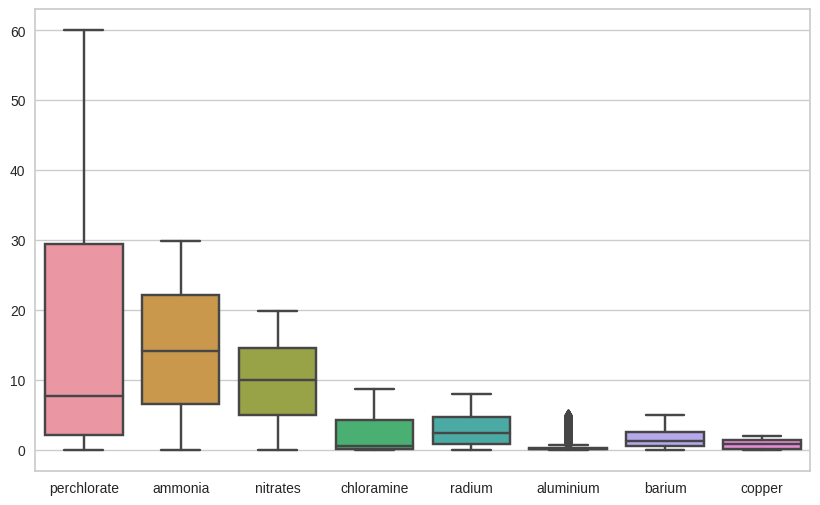

In [ ]:
# Verificando a distribuição dos dados com boxplot
# Plotar o boxplot usando Seaborn

medidas_dispersao = data.std()
print("Medidas de dispersão: ")
print(medidas_dispersao)

atributos_variaveis = medidas_dispersao.sort_values(ascending=False).index
# Pega os 8 atributos com as maiores dispersões para mostrar no  boxplot
top_atributos = atributos_variaveis[:8]
plt.figure(figsize=(10, 6))
data_top_atributos = data[top_atributos]
sns.boxplot(data=data_top_atributos)

# Exibir o gráfico
plt.show()

In [ ]:
# sample = data.sample(n=100)
# sample_false = sample[sample["is_safe"] == 0]
# sample_true  = sample[sample["is_safe"] == 1]
# plt.plot(sample_false["chromium"], sample_false["cadmium"], ls='', marker = 's')
# plt.plot(sample_true["chromium"], sample_true["cadmium"], ls='', marker = 'o')
# plt.xlabel("chromium")
# plt.ylabel("cadmium")

# plt.show()

# **Desempenho do dataset sem pré-processamento**

## Separação da amostra

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

# Aleatorizando as linhas
data = data.sample(frac=1, replace=False, random_state=42)

# Separando os dados de treino e teste
X = data.drop("is_safe", axis = 1)
y = data["is_safe"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

## K-Nearest Neighbours

+--------------------------------------------------------+
                  precision    recall  f1-score   support

           0       0.90      0.95      0.92      1420
           1       0.25      0.12      0.16       180

    accuracy                           0.86      1600
   macro avg       0.57      0.54      0.54      1600
weighted avg       0.82      0.86      0.84      1600

+--------------------------------------------------------+


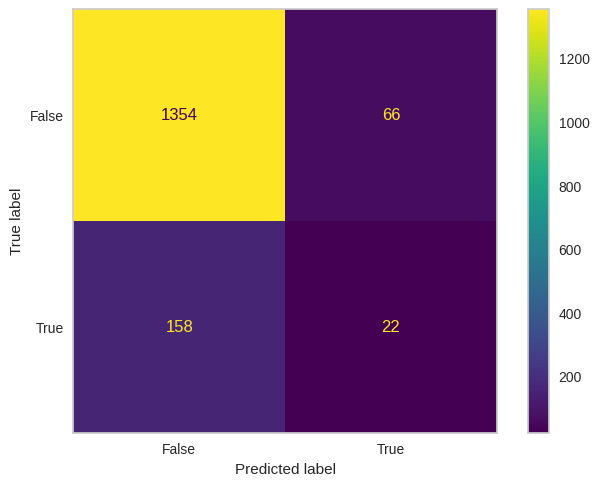

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict

# Criando o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Treino
knn_model.fit(X_train, y_train)

# Teste de eficiencia
treino = knn_model.predict(X_test)

print("+--------------------------------------------------------+")
print("   ", classification_report(y_test, treino))
print("+--------------------------------------------------------+")

confusao = confusion_matrix(y_test, treino)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [False, True])
cm_display.plot()

plt.grid(False)
plt.show()

+--------------------------------------------------------+
                  precision    recall  f1-score   support

           0       0.90      0.98      0.93      7084
           1       0.38      0.11      0.17       912

    accuracy                           0.88      7996
   macro avg       0.64      0.54      0.55      7996
weighted avg       0.84      0.88      0.85      7996

+--------------------------------------------------------+


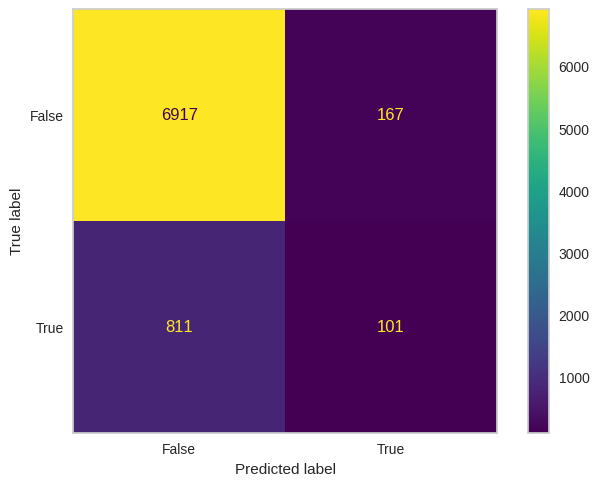

In [ ]:
from sklearn.metrics._plot.regression import PredictionErrorDisplay
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
# Teste de eficiencia
crossknn_model = KNeighborsClassifier(n_neighbors=5)

treino = cross_val_predict(crossknn_model, X, y, cv = 10)

print("+--------------------------------------------------------+")
print("   ", classification_report(y, treino))
print("+--------------------------------------------------------+")

# Como estamos fazendo um k = 10 e temos uma quantidade muito maior de 0's do que 1's na classe is_safe, então
# temos que, se pegarmos um bloco para treinar que tenha muitos 0's, tendemos a classificar como sendo 0
# e com isso, como temos muitos 0's, a acurácia vai ser alta, mas o recall vai ser baixo (pois em muitos casos iremos classificar os
# positivos como sendo negativos, aumentando a quantidade de falsos negativos)

confusao = confusion_matrix(y, treino)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [False, True])
cm_display.plot()

plt.grid(False)
plt.show()

## Árvore de Decisão

+--------------------------------------------------------+
                  precision    recall  f1-score   support

           0       0.97      0.97      0.97      1420
           1       0.78      0.76      0.77       180

    accuracy                           0.95      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.95      0.95      0.95      1600

+--------------------------------------------------------+


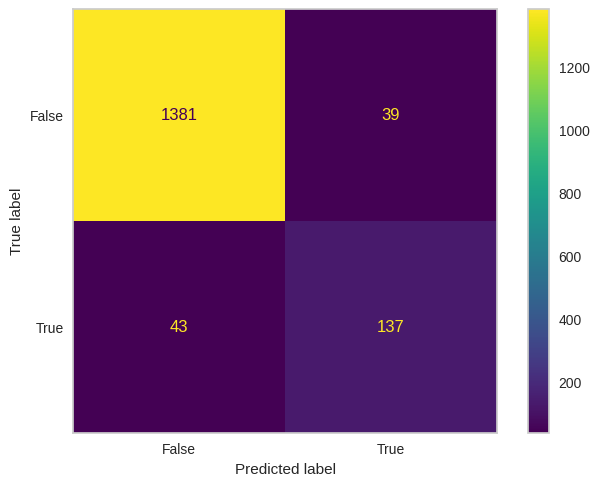

In [ ]:
# Criando o modelo Árvore de Decisão
dtree_model = DecisionTreeClassifier()

# Treino
dtree_model.fit(X_train, y_train)

# Teste de eficiencia
treino = dtree_model.predict(X_test)

print("+--------------------------------------------------------+")
print("   ", classification_report(y_test, treino))
print("+--------------------------------------------------------+")

confusao = confusion_matrix(y_test, treino)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [False, True])
cm_display.plot()

plt.grid(False)
plt.show()

+--------------------------------------------------------+
                  precision    recall  f1-score   support

           0       0.98      0.97      0.97      7084
           1       0.79      0.81      0.80       912

    accuracy                           0.95      7996
   macro avg       0.88      0.89      0.89      7996
weighted avg       0.95      0.95      0.95      7996

+--------------------------------------------------------+


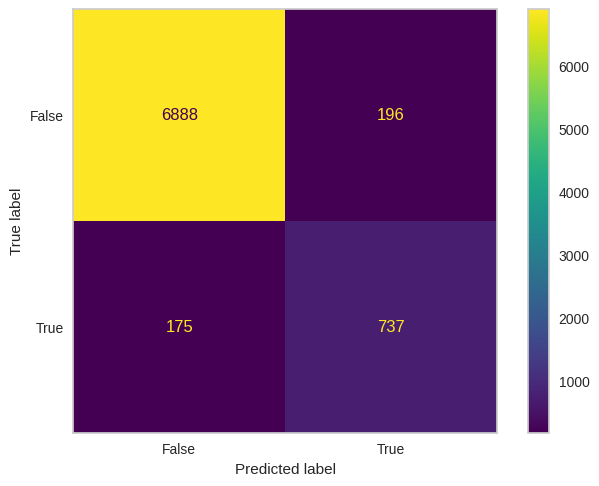

In [ ]:
# Criando o modelo Árvore de Decisão
crossdtree_model = DecisionTreeClassifier()

# Treino
crossdtree_model.fit(X_train, y_train)

# Teste de eficiencia
treino = cross_val_predict(crossdtree_model, X, y, cv=10)

print("+--------------------------------------------------------+")
print("   ", classification_report(y, treino))
print("+--------------------------------------------------------+")

confusao = confusion_matrix(y, treino)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [False, True])
cm_display.plot()

plt.grid(False)
plt.show()

## Rede Neural

+--------------------------------------------------------+
                  precision    recall  f1-score   support

           0       0.96      0.98      0.97      1420
           1       0.83      0.66      0.73       180

    accuracy                           0.95      1600
   macro avg       0.89      0.82      0.85      1600
weighted avg       0.94      0.95      0.94      1600

+--------------------------------------------------------+


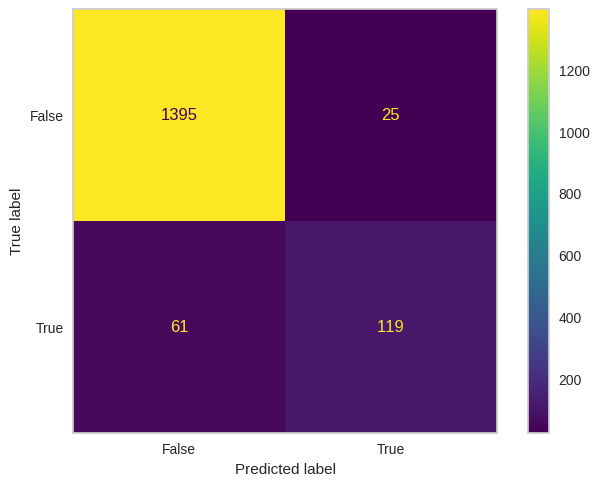

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), max_iter=500)

mlp.fit(X_train,y_train)

treino = mlp.predict(X_test)

print("+--------------------------------------------------------+")
print("   ", classification_report(y_test, treino))
print("+--------------------------------------------------------+")

confusao = confusion_matrix(y_test, treino)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [False, True])
cm_display.plot()
plt.grid(False)
plt.show()

+--------------------------------------------------------+
                  precision    recall  f1-score   support

           0       0.95      0.98      0.97      7084
           1       0.80      0.64      0.71       912

    accuracy                           0.94      7996
   macro avg       0.88      0.81      0.84      7996
weighted avg       0.94      0.94      0.94      7996

+--------------------------------------------------------+


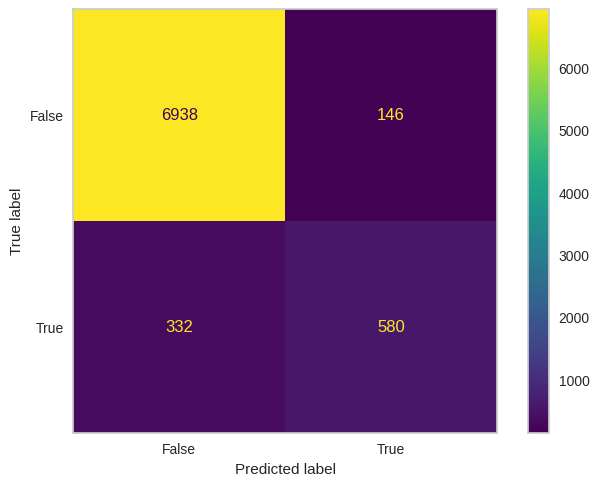

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), max_iter=500)

#mlp.fit(X_train,y_train)

treino = cross_val_predict(mlp, X, y, cv=10)

print("+--------------------------------------------------------+")
print("   ", classification_report(y, treino))
print("+--------------------------------------------------------+")

confusao = confusion_matrix(y, treino)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [False, True])
cm_display.plot()
plt.grid(False)
plt.show()

In [ ]:
# ----------Tentativa de PCA-------------#

# from sklearn.decomposition import PCA

# #Cria uma instância da classe PCA
# PCAinst = PCA(n_components=1, whiten=True)

# #Ajusta a instância aos dados e o transforma
# trans = PCAinst.fit_transform(data.iloc[0:,6:8])

# #Configura o dataframe resultante
# data_trans = pd.DataFrame(data=trans)
# data_trans.columns = ['microorganisms']
# data_trans.corrwith(data["is_safe"])
# #data_trans['species'] =  data['species']

# data["microorganisms"] = pd.to_numeric(data_trans["microorganisms"])
# dataPCA = data.drop("bacteria", axis = 1)
# dataPCA = data.drop("viruses", axis = 1 )

# print(dataPCA)

# **Normalização dos dados**

## Z-Score

In [ ]:
# Aplicando normalização z-score
# Selecionando todas as colunas com exceção da classe (is_safe)
cols_to_normalize = data.columns[:-1]
scaler = StandardScaler()
df_zscore = pd.DataFrame(scaler.fit_transform(data[cols_to_normalize]), columns=cols_to_normalize)
df_zscore["is_safe"] = data["is_safe"] # n converteu pra int :(
# Por algum motivo, o data["is_safe"] tem elemento null, então iremos remover
df_zscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

## Normalize

In [ ]:
from sklearn import preprocessing

colunas_normais = data.drop("is_safe", axis = 1)
data_normal = preprocessing.normalize(colunas_normais)

df_zscore = pd.DataFrame(data_normal, columns = colunas_normais.columns)
df_zscore["is_safe"] = data["is_safe"]
print(df_zscore)

      aluminium   ammonia   arsenic    barium   cadmium  chloramine  chromium  \
0      0.000561  0.007288  0.005046  0.017380  0.002803    0.005606  0.001682   
1      0.009211  0.911856  0.001365  0.009211  0.000239    0.026609  0.030702   
2      0.000533  0.456276  0.006925  0.083371  0.002930    0.106811  0.005327   
3      0.000495  0.160916  0.003466  0.036639  0.002971    0.012873  0.001981   
4      0.002238  0.218226  0.007834  0.102958  0.001119    0.012310  0.004476   
...         ...       ...       ...       ...       ...         ...       ...   
7991   0.003916  0.949995  0.004476  0.022939  0.005035    0.033569  0.005035   
7992   0.003531  0.163451  0.001513  0.149830  0.000000    0.013116  0.003531   
7993   0.064288  0.438411  0.000298  0.078277  0.000268    0.030358  0.008631   
7994   0.002313  0.369614  0.001850  0.113336  0.004626    0.010177  0.001850   
7995   0.004507  0.579087  0.001690  0.042249  0.003380    0.000563  0.003943   

        copper  flouride  b

In [ ]:
# Removendo os valores nulos de is_safe dentro do df_zscore
print(data["is_safe"].size)
print(data.isnull().sum())
print("-------------")
print(df_zscore.isnull().sum())
print(df_zscore["is_safe"].size)
df_zscore = df_zscore.dropna()
print("----------")
print(df_zscore.isnull().sum())
print(df_zscore.info())

7996
aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64
-------------
aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64
7996
----------
aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitr

In [ ]:
#print("Maior valor: ")
#print(data["perchlorate"].max())
#print("Menor valor: ")
#print(data["perchlorate"].min())
#print("Média: ")
#print(data["perchlorate"].mean())

## Correlação

In [ ]:
df_zscore.corrwith(df_zscore["is_safe"])

aluminium     -0.006727
ammonia        0.010740
arsenic       -0.008661
barium        -0.017866
cadmium        0.000001
chloramine    -0.020758
chromium      -0.012572
copper         0.002515
flouride      -0.009562
bacteria      -0.011245
viruses       -0.012060
lead          -0.019041
nitrates       0.006601
nitrites      -0.013772
mercury        0.004961
perchlorate   -0.012010
radium        -0.001130
selenium      -0.003573
silver        -0.019911
uranium       -0.007729
is_safe        1.000000
dtype: float64

<Axes: >

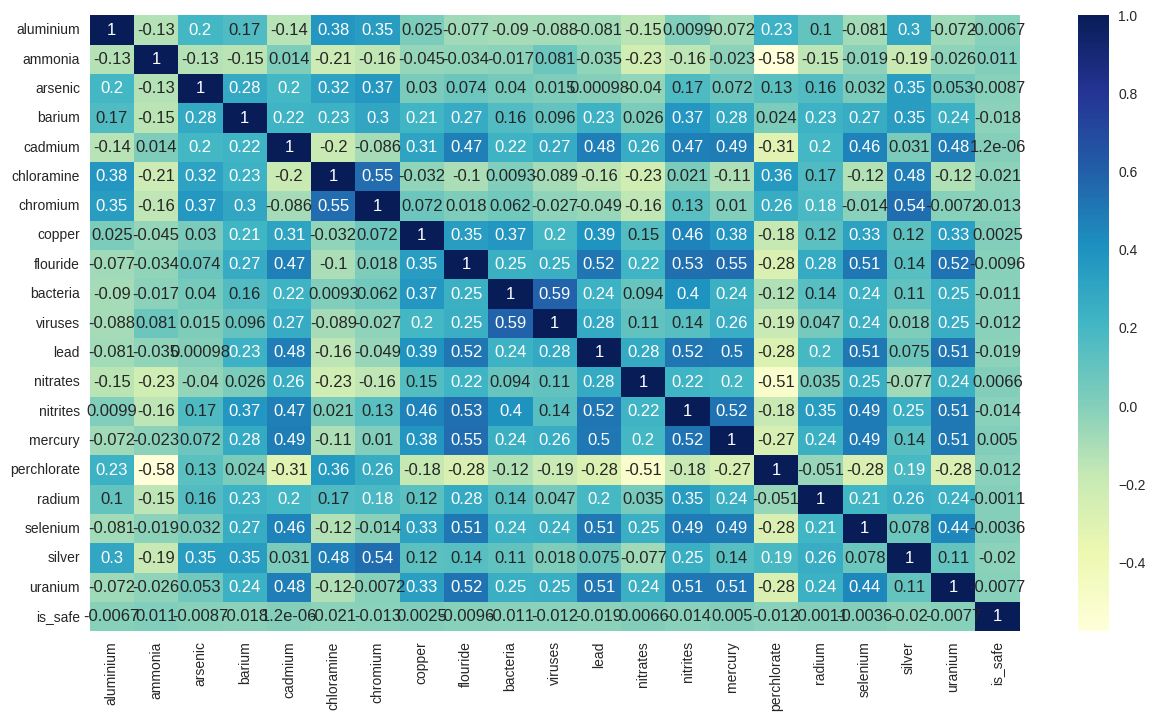

In [ ]:
dataToCorr = df_zscore
plt.figure(figsize=(15, 8))
sns.heatmap(dataToCorr.corr(), annot=True, cmap="YlGnBu")

In [ ]:
df_zscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7993 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7993 non-null   float64
 1   ammonia      7993 non-null   float64
 2   arsenic      7993 non-null   float64
 3   barium       7993 non-null   float64
 4   cadmium      7993 non-null   float64
 5   chloramine   7993 non-null   float64
 6   chromium     7993 non-null   float64
 7   copper       7993 non-null   float64
 8   flouride     7993 non-null   float64
 9   bacteria     7993 non-null   float64
 10  viruses      7993 non-null   float64
 11  lead         7993 non-null   float64
 12  nitrates     7993 non-null   float64
 13  nitrites     7993 non-null   float64
 14  mercury      7993 non-null   float64
 15  perchlorate  7993 non-null   float64
 16  radium       7993 non-null   float64
 17  selenium     7993 non-null   float64
 18  silver       7993 non-null   float64
 19  uraniu

# Amostragem

In [ ]:
print("Quantidade de água classificada como não segura: ")
print(df_zscore[df_zscore["is_safe"] == 0].size / 21)

print("Quantidade de água classificada como segura: ")
print(df_zscore[df_zscore["is_safe"] == 1].size / 21)

df_zscore_sample_0 = df_zscore[df_zscore["is_safe"] == 0].sample(n=1000)
df_zscore_sample_1 = df_zscore[df_zscore["is_safe"] == 1]
df_zscore_sample = pd.concat([df_zscore_sample_0, df_zscore_sample_1], axis=0)

df_zscore_misturado = df_zscore_sample.sample(frac=1).reset_index(drop=True)
print(df_zscore_misturado)

Quantidade de água classificada como não segura: 
7084.0
Quantidade de água classificada como segura: 
909.0
      aluminium   ammonia   arsenic    barium   cadmium  chloramine  chromium  \
0      0.002866  0.598124  0.002456  0.031933  0.002456    0.002456  0.002047   
1      0.003901  0.647958  0.003121  0.015604  0.001170    0.000000  0.002341   
2      0.000704  0.260397  0.000704  0.054227  0.000123    0.106694  0.011972   
3      0.002248  0.523776  0.000899  0.044510  0.000000    0.019782  0.003597   
4      0.011129  0.031223  0.000031  0.072647  0.000155    0.054717  0.021640   
...         ...       ...       ...       ...       ...         ...       ...   
1904   0.002645  0.805048  0.002057  0.024983  0.002351    0.000882  0.002939   
1905   0.003044  0.502606  0.017926  0.029426  0.001353    0.210377  0.000000   
1906   0.003248  0.543467  0.027937  0.132862  0.000325    0.159174  0.013319   
1907   0.001001  0.465958  0.000334  0.024182  0.000017    0.072712  0.002835   


# Seleção de atributos

In [ ]:
X_zs = df_zscore_misturado.drop("is_safe", axis = 1)
Y_zs = df_zscore_misturado["is_safe"]

estimador = DecisionTreeClassifier()

# Temos um total de 20 atributos (sem contar com a classe) e vamos considerar os 15 mais relevantes
selecao_rfe = RFE(estimador, n_features_to_select=15)

# Realizar a seleção recursiva de atributos
X_selecionado = selecao_rfe.fit_transform(X_zs, Y_zs)

# Obter os índices dos atributos selecionados
indices_atributos_selecionados = selecao_rfe.get_support(indices=True)

print("Índices das colunas que foram escolhidas: ")
# print(indices_atributos_selecionados)

# Obter os nomes dos atributos selecionados
atributos_selecionados = X_zs.columns[indices_atributos_selecionados]

print("Colunas que foram escolhidas: ")
# print(atributos_selecionados)

# Dataset somente com as colunas escolhidas
df_zscore_filtrado = df_zscore_misturado[atributos_selecionados]
df_zscore_filtrado["is_safe"] = Y_zs

print(df_zscore_filtrado)

X_zs_filtrado = df_zscore_filtrado.drop("is_safe", axis=1)
Y_zs_filtrado = df_zscore_filtrado["is_safe"]

# O tamanho da base de teste será de 30%, enquanto que a base de treino terá 70%
X_train_filtrado, X_test_filtrado, Y_train_filtrado, Y_test_filtrado = train_test_split(X_zs_filtrado, Y_zs_filtrado, test_size=0.2,random_state=100)

Índices das colunas que foram escolhidas: 
Colunas que foram escolhidas: 
      aluminium    barium   cadmium  chloramine  chromium    copper  flouride  \
0      0.002866  0.031933  0.002456    0.002456  0.002047  0.032342  0.015148   
1      0.003901  0.015604  0.001170    0.000000  0.002341  0.034719  0.027307   
2      0.000704  0.054227  0.000123    0.106694  0.011972  0.022888  0.008803   
3      0.002248  0.044510  0.000000    0.019782  0.003597  0.000450  0.053502   
4      0.011129  0.072647  0.000155    0.054717  0.021640  0.060282  0.014839   
...         ...       ...       ...         ...       ...       ...       ...   
1904   0.002645  0.024983  0.002351    0.000882  0.002939  0.027335  0.024983   
1905   0.003044  0.029426  0.001353    0.210377  0.000000  0.027396  0.008117   
1906   0.003248  0.132862  0.000325    0.159174  0.013319  0.021440  0.012994   
1907   0.001001  0.024182  0.000017    0.072712  0.002835  0.014176  0.020179   
1908   0.001295  0.032381  0.000155

<ipython-input-29-0099a2e0c7f8>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Testes de Classificação

## K-Nearest Neighbour

Accuracy: 0.500000
Precision: 50.6173%
Recall: 42.4870%
F1 score: 46.1972%
+---------------------+
              precision    recall  f1-score   support

         0.0       0.50      0.58      0.53       189
         1.0       0.51      0.42      0.46       193

    accuracy                           0.50       382
   macro avg       0.50      0.50      0.50       382
weighted avg       0.50      0.50      0.50       382



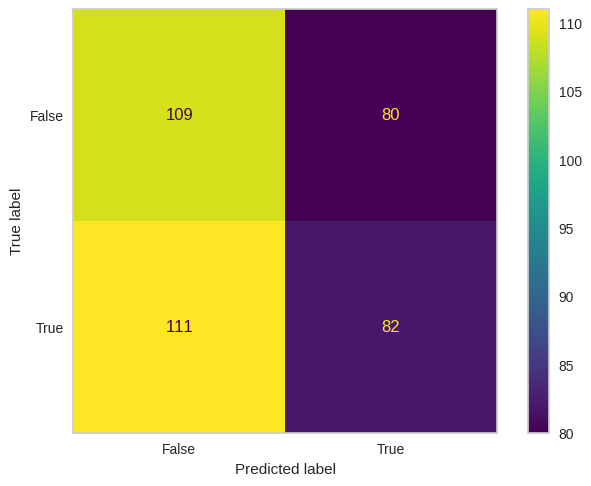

In [ ]:
# Criando o modelo
knn_model_f = KNeighborsClassifier(n_neighbors=5)

# Treinando
knn_model_f.fit(X_train_filtrado, Y_train_filtrado)

# Valores preditos
treino_f = knn_model_f.predict(X_test_filtrado)

# Calcular acurácia
accuracy = metrics.accuracy_score(Y_test_filtrado, treino_f)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(Y_test_filtrado, treino_f)
print('Precision: %.4f%%' % (precision*100))
# recall: tp / (tp + fn)
recall = metrics.recall_score(Y_test_filtrado, treino_f)
print('Recall: %.4f%%' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(Y_test_filtrado, treino_f)
print('F1 score: %.4f%%' % (f1*100))
print("+---------------------+")

print(classification_report(Y_test_filtrado, treino_f))

confusao = confusion_matrix(Y_test_filtrado, treino_f)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [False, True])
cm_display.plot()
plt.grid(False)
plt.show()

+--------------------------------------------------------+
                  precision    recall  f1-score   support

         0.0       0.52      0.55      0.53      1000
         1.0       0.47      0.44      0.45       909

    accuracy                           0.50      1909
   macro avg       0.49      0.49      0.49      1909
weighted avg       0.49      0.50      0.49      1909

+--------------------------------------------------------+


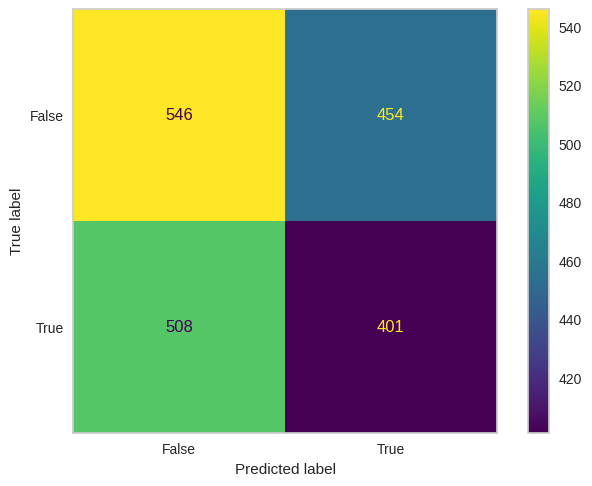

In [ ]:
# Teste de eficiencia
crossknn_model = KNeighborsClassifier(n_neighbors=5)
# K = 10 -> Quantidade de cortes
treino = cross_val_predict(crossknn_model, X_zs_filtrado, Y_zs_filtrado, cv = 10)

print("+--------------------------------------------------------+")
print("   ", classification_report(Y_zs_filtrado, treino))
print("+--------------------------------------------------------+")

# Como estamos fazendo um k = 10 e temos uma quantidade muito maior de 0's do que 1's na classe is_safe, então
# temos que, se pegarmos um bloco para treinar que tenha muitos 0's, tendemos a classificar como sendo 0
# e com isso, como temos muitos 0's, a acurácia vai ser alta, mas o recall vai ser baixo (pois em muitos casos iremos classificar os
# positivos como sendo negativos, aumentando a quantidade de falsos negativos)

confusao = confusion_matrix(Y_zs_filtrado, treino)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [False, True])
cm_display.plot()
plt.grid(False)
plt.show()

## Decision Tree

Accuracy: 0.479058
Precision: 48.4375%
Recall: 48.1865%
F1 score: 48.3117%
+---------------------+
              precision    recall  f1-score   support

         0.0       0.47      0.48      0.47       189
         1.0       0.48      0.48      0.48       193

    accuracy                           0.48       382
   macro avg       0.48      0.48      0.48       382
weighted avg       0.48      0.48      0.48       382



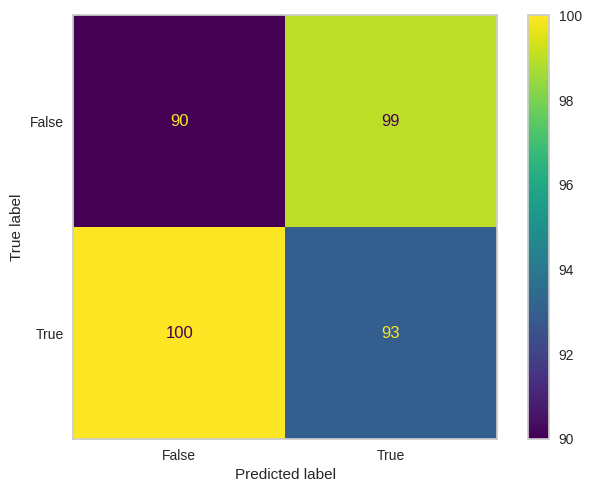

In [ ]:
# Criando o modelo
dtree_model_f = DecisionTreeClassifier()

# Treinando
dtree_model_f.fit(X_train_filtrado, Y_train_filtrado)

# Valores preditos
treino_f = dtree_model_f.predict(X_test_filtrado)

# Calcular acurácia
accuracy = metrics.accuracy_score(Y_test_filtrado, treino_f)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(Y_test_filtrado, treino_f)
print('Precision: %.4f%%' % (precision*100))
# recall: tp / (tp + fn)
recall = metrics.recall_score(Y_test_filtrado, treino_f)
print('Recall: %.4f%%' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(Y_test_filtrado, treino_f)
print('F1 score: %.4f%%' % (f1*100))
print("+---------------------+")

print(classification_report(Y_test_filtrado, treino_f))

confusao = confusion_matrix(Y_test_filtrado, treino_f)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [False, True])
cm_display.plot()
plt.grid(False)
plt.show()

+--------------------------------------------------------+
                  precision    recall  f1-score   support

         0.0       0.52      0.52      0.52      1000
         1.0       0.47      0.46      0.47       909

    accuracy                           0.50      1909
   macro avg       0.49      0.49      0.49      1909
weighted avg       0.49      0.50      0.49      1909

+--------------------------------------------------------+


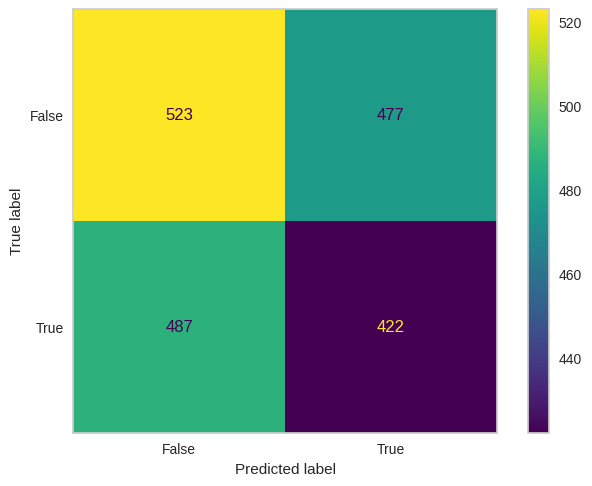

In [ ]:
# Teste de eficiencia
crossdtree_model = DecisionTreeClassifier()
# K = 10 -> Quantidade de cortes
treino = cross_val_predict(crossdtree_model, X_zs_filtrado, Y_zs_filtrado, cv = 10)

print("+--------------------------------------------------------+")
print("   ", classification_report(Y_zs_filtrado, treino))
print("+--------------------------------------------------------+")

# Como estamos fazendo um k = 10 e temos uma quantidade muito maior de 0's do que 1's na classe is_safe, então
# temos que, se pegarmos um bloco para treinar que tenha muitos 0's, tendemos a classificar como sendo 0
# e com isso, como temos muitos 0's, a acurácia vai ser alta, mas o recall vai ser baixo (pois em muitos casos iremos classificar os
# positivos como sendo negativos, aumentando a quantidade de falsos negativos)

confusao = confusion_matrix(Y_zs_filtrado, treino)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [False, True])
cm_display.plot()
plt.grid(False)
plt.show()

## Rede Neural

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



+--------------------------------------------------------+
                  precision    recall  f1-score   support

         0.0       0.49      0.77      0.60       189
         1.0       0.50      0.22      0.31       193

    accuracy                           0.49       382
   macro avg       0.50      0.50      0.46       382
weighted avg       0.50      0.49      0.45       382

Tamanho total de teste:  382
+--------------------------------------------------------+
0.49476439790575916


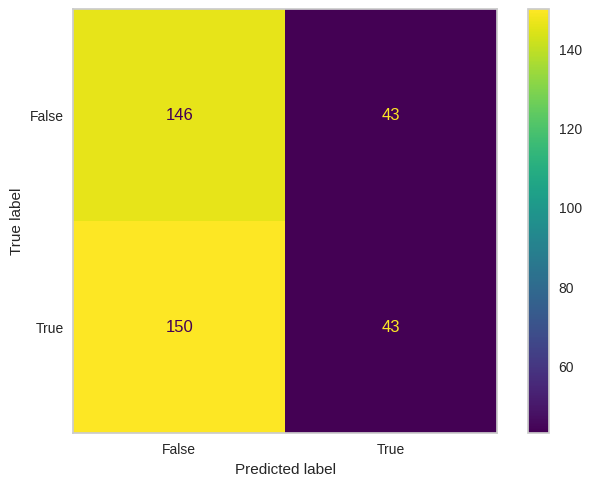

In [ ]:
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', random_state=42)

mlp.fit(X_train_filtrado, Y_train_filtrado)

treino = mlp.predict(X_test_filtrado)

print("+--------------------------------------------------------+")
print("   ", classification_report(Y_test_filtrado, treino))
print("Tamanho total de teste: ", Y_test_filtrado.size)
print("+--------------------------------------------------------+")

accuracy = accuracy_score(Y_test_filtrado, treino)
print(accuracy)


confusao = confusion_matrix(Y_test_filtrado, treino)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [False, True])
cm_display.plot()
plt.grid(False)
plt.show()

+--------------------------------------------------------+
                  precision    recall  f1-score   support

         0.0       0.52      0.98      0.68      1000
         1.0       0.51      0.03      0.05       909

    accuracy                           0.52      1909
   macro avg       0.52      0.50      0.37      1909
weighted avg       0.52      0.52      0.38      1909

+--------------------------------------------------------+


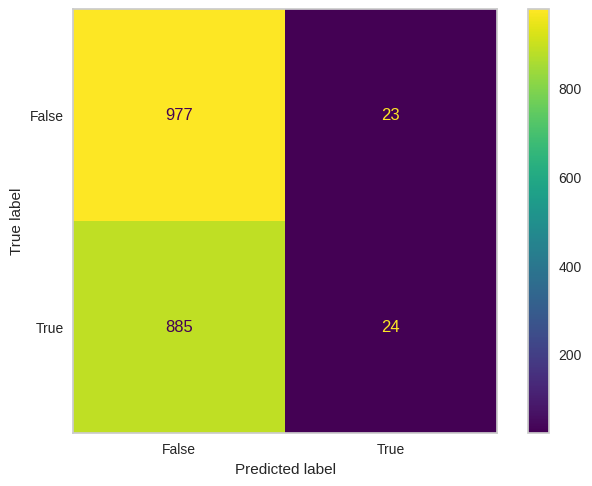

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), max_iter=500)

#mlp.fit(X_train,y_train)

treino = cross_val_predict(mlp, X_zs_filtrado, Y_zs_filtrado, cv=10)

print("+--------------------------------------------------------+")
print("   ", classification_report(Y_zs_filtrado, treino))
print("+--------------------------------------------------------+")

confusao = confusion_matrix(Y_zs_filtrado, treino)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusao, display_labels = [False, True])
cm_display.plot()
plt.grid(False)
plt.show()

# Nova seção